Importing libraries

In [7]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt


Read the data from the CSV file named TdF & viewing it

In [2]:
TdF= pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-04-07/tdf_winners.csv')
TdF

,edition,start_date,winner_name,winner_team,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age,born,died,full_name,nickname,birth_town,birth_country,nationality
0,1,1903-07-01,Maurice Garin,La Française,2428.0,94.553889,2.989167,3,6,1.62,60.0,32,1871-03-03,1957-02-19,NaN,The Little Chimney-sweep,Arvier,Italy,France
1,2,1904-07-02,Henri Cornet,Conte,2428.0,96.098611,2.270556,1,3,NaN,NaN,19,1884-08-04,1941-03-18,NaN,Le rigolo (The joker),Desvres,France,France
2,3,1905-07-09,Louis Trousselier,Peugeot–Wolber,2994.0,NaN,NaN,5,10,NaN,NaN,24,1881-06-29,1939-04-24,NaN,Levaloy / Trou-trou,Paris,France,France
3,4,1906-07-04,René Pottier,Peugeot–Wolber,4637.0,NaN,NaN,5,12,NaN,NaN,27,1879-06-05,1907-01-25,NaN,NaN,Moret-sur-Loing,France,France
4,5,1907-07-08,Lucien Petit-Breton,Peugeot–Wolber,4488.0,NaN,NaN,2,5,NaN,NaN,24,1882-10-18,1917-12-20,Lucien Georges Mazan,Lucien Petit-Breton,Plessé,France,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,102,2015-07-04,Chris Froome,Team Sky,3360.3,84.770556,0.016944,1,16,1.86,69.0,30,1985-05-20,NaN,Christopher Clive Froome,Froomey,Nairobi,Kenya,Great Britain
102,103,2016-07-02,Chris Froome,Team Sky,3529.0,89.080000,0.067778,2,14,1.86,69.0,31,1985-05-20,NaN,Christopher Clive Froome,Froomey,Nairobi,Kenya,Great Britain
103,104,2017-07-01,Chris Froome,Team Sky,3540.0,86.348611,0.015000,0,15,1.86,69.0,32,1985-05-20,NaN,Christopher Clive Froome,Froomey,Nairobi,Kenya,Great Britain
104,105,2018-07-07,Geraint Thomas,Team Sky,3349.0,83.286944,0.016944,2,11,1.83,71.0,32,1986-05-25,NaN,Geraint Howell Thomas,G,Cardiff,Wales,Great Britain


Convert the time columns from strings to timedeltas

In [4]:
TdF['time_overall'] = pd.to_timedelta(TdF['time_overall'])
TdF['time_margin'] = pd.to_timedelta(TdF['time_margin'])

C:\Users\JANUARIUS\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
C:\Users\JANUARIUS\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")


Calculate the time difference between the winner and runner-up & print some summary stats

In [6]:
TdF['time_difference'] = TdF['time_margin']

print('Mean winning time:', TdF['time_overall'].mean())
print('Median winning time:', TdF['time_overall'].median())
print('Mean time difference:', TdF['time_difference'].mean())
print('Median time difference:', TdF['time_difference'].median())

Mean winning time: 0 days 00:00:00.000000125
Median winning time: 0 days 00:00:00.000000114
Mean time difference: 0 days 00:00:00
Median time difference: 0 days 00:00:00


To create a boxplot

<Axes: title={'center': 'time_overall_sec'}, xlabel='stages_led'>

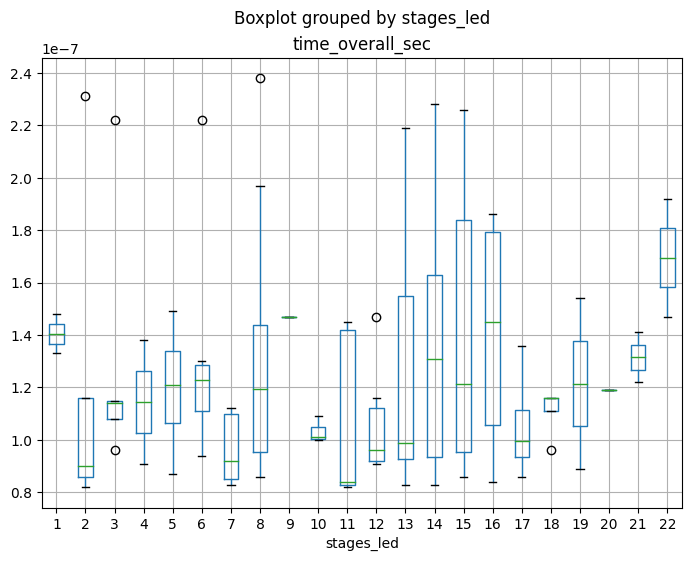

In [12]:
TdF['time_overall_sec'] = TdF['time_overall'].dt.total_seconds()
fig, ax = plt.subplots(figsize=(8, 6))
TdF.boxplot(column='time_overall_sec', by='stages_led', ax=ax)

What relationship is there between a winners age and the number of stages led ?

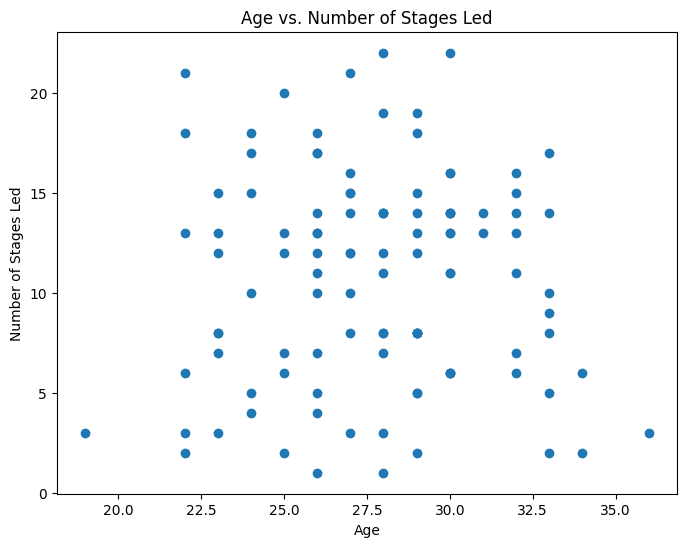

In [13]:
# Create a scatter plot of age vs. stages led
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(TdF['age'], TdF['stages_led'])

# Add some labels and a title
ax.set_xlabel('Age')
ax.set_ylabel('Number of Stages Led')
ax.set_title('Age vs. Number of Stages Led')

# Show the plot
plt.show()

The above code  produces a scatter plot of age vs. stages led, which can be used to explore whether there is any relationship between a winner's age and the number of stages led. From the plot, we can see that there doesn't appear to be a strong relationship between the two variables. There are winners of all ages who have led varying numbers of stages, suggesting that age is not a strong predictor of success in leading stages.

Sort the data by the year of the winning in descending order

In [15]:
TdF_sorted = TdF.sort_values('edition', ascending=False)
TdF_sorted[['winner_name', 'winner_team', 'nationality']].head()

KeyError: "['winner_nationality'] not in index"